<a href="https://colab.research.google.com/github/AcimGithub/PCVK_Genap_2023/blob/main/SmokeDetect.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from IPython.display import Image, clear_output
!pip install roboflow
clear_output()

In [5]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [2]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 645.7/645.7 kB 10.5 MB/s eta 0:00:00


In [3]:
from ultralytics import YOLO
import os
from IPython.display import display, Image
from IPython import display
display.clear_output()
!yolo mode=checks

Traceback (most recent call last):
  File "/usr/local/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/cfg/__init__.py", line 392, in entrypoint
    raise ValueError(f"Invalid 'mode={mode}'. Valid modes are {MODES}.\n{CLI_HELP_MSG}")
ValueError: Invalid 'mode=<module 'ultralytics.utils.checks' from '/usr/local/lib/python3.10/dist-packages/ultralytics/utils/checks.py'>'. Valid modes are ('train', 'val', 'predict', 'export', 'track', 'benchmark').

    Arguments received: ['yolo', 'mode=checks']. Ultralytics 'yolo' commands use the following syntax:

        yolo TASK MODE ARGS

        Where   TASK (optional) is one of ('detect', 'segment', 'classify', 'pose')
                MODE (required) is one of ('train', 'val', 'predict', 'export', 'track', 'benchmark')
                ARGS (optional) are any number of custom 'arg=value' pairs like 'imgsz=320' that override defaults.
                    See all ARGS at https://d

In [4]:


from roboflow import Roboflow
rf = Roboflow(api_key="LaTgwAgIbAOSK0f15fD5")
project = rf.workspace("polinema-k17le").project("smokeydockey")
dataset = project.version(2).download("yolov8")


loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.0.215, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to SmokeyDockey-2 in yolov8:: 100%|██████████| 112/112 [00:00<00:00, 7183.89it/s]


In [6]:
!yolo task=detect mode=train model=yolov8m.pt data={dataset.location}/data.yaml epochs=20 imgsz=640

Ultralytics YOLOv8.0.215 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/SmokeyDockey-2/data.yaml, epochs=20, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=Fal

In [10]:
!yolo task=detect mode=val model=/content/runs/detect/train2/weights/best.pt data={dataset.location}/data.yaml

Ultralytics YOLOv8.0.215 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs
val: Scanning /content/SmokeyDockey-2/valid/labels.cache... 6 images, 0 backgrounds, 0 corrupt: 100% 6/6 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 1/1 [00:00<00:00,  3.15it/s]
                   all          6          9          1      0.431      0.557      0.376
Speed: 0.8ms preprocess, 38.3ms inference, 0.0ms loss, 5.7ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


In [18]:
!yolo task=detect mode=predict model=/content/runs/detect/train2/weights/best.pt conf=0.5 source={dataset.location}/valid/images

Ultralytics YOLOv8.0.215 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/6 /content/SmokeyDockey-2/valid/images/0000000011_jpg.rf.8a669dc6968a86f468a77c316567cac6.jpg: 640x640 2 smokes, 37.0ms
image 2/6 /content/SmokeyDockey-2/valid/images/0000000023_jpg.rf.6b55bed5e63922f69304782e0c00b4d8.jpg: 640x640 (no detections), 37.0ms
image 3/6 /content/SmokeyDockey-2/valid/images/0000000226_jpg.rf.b8c1c08504e754965cb63a88a0439121.jpg: 640x640 1 smoke, 37.0ms
image 4/6 /content/SmokeyDockey-2/valid/images/0000000312_jpg.rf.4479094b809651b32456ad336011e7e0.jpg: 640x640 1 smoke, 29.1ms
image 5/6 /content/SmokeyDockey-2/valid/images/0000019696_jpg.rf.961aacc4f37b453b9f258db2a8f6ae84.jpg: 640x640 3 smokes, 26.5ms
image 6/6 /content/SmokeyDockey-2/valid/images/0000019803_jpg.rf.492d77a18f067c79ba128b57a4884fdf.jpg: 640x640 1 smoke, 26.5ms
Speed: 1.8ms preprocess, 32.2ms inference, 1.6ms postproce

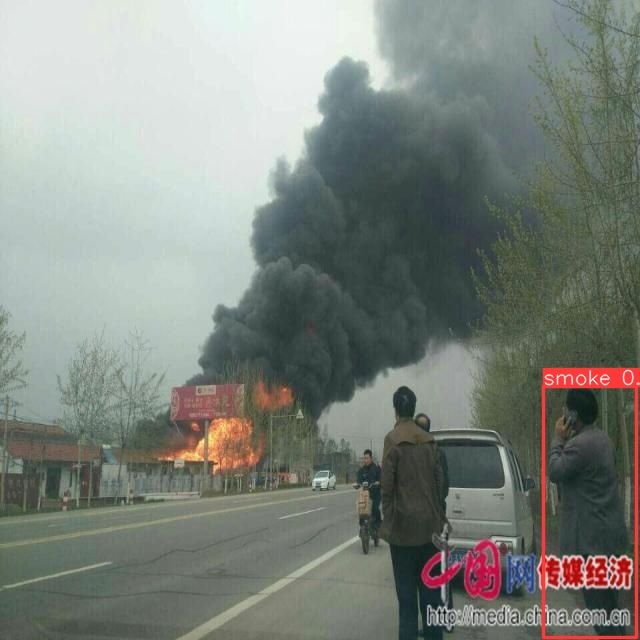

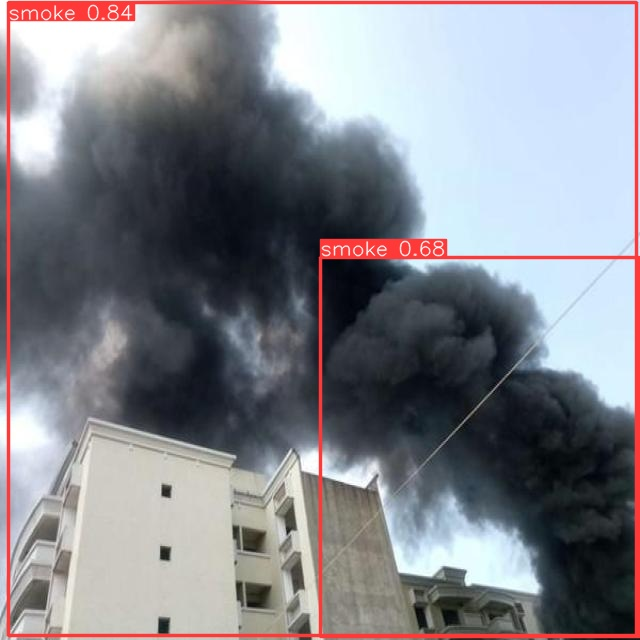

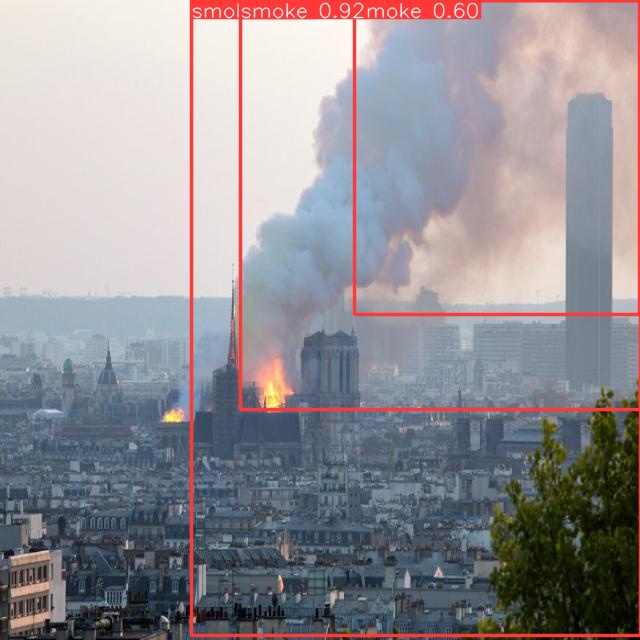

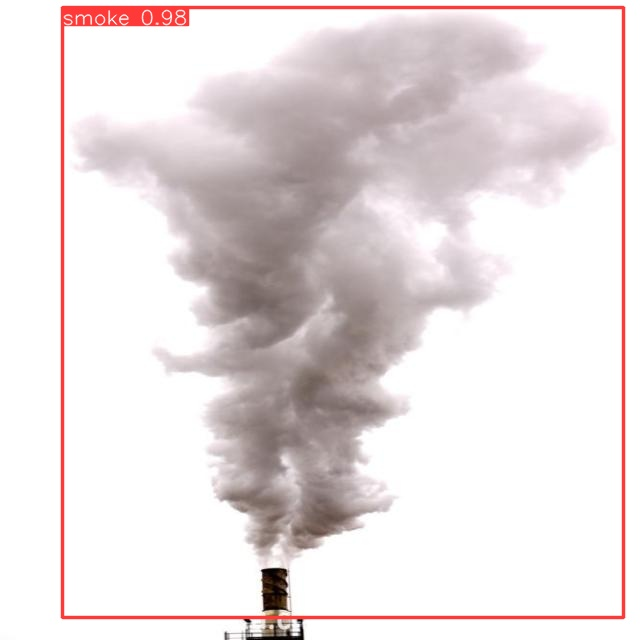

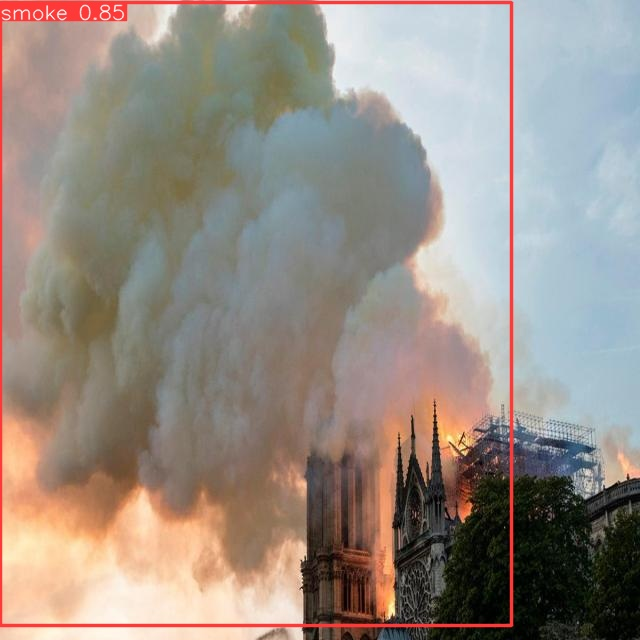

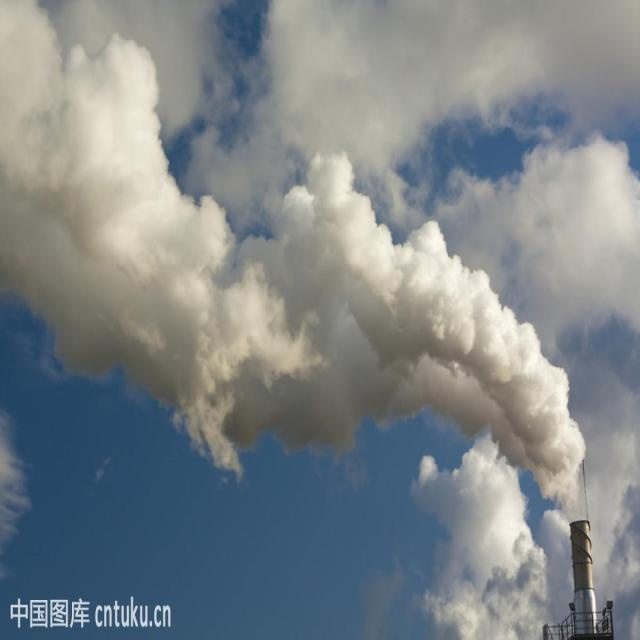

In [19]:
import glob
from IPython.display import Image, display

for image_path in glob.glob('/content/runs/detect/predict2/*jpg'):
    display(Image(filename=image_path, height=600))
    print("\n")